<a href="https://colab.research.google.com/github/insoucyant/Pricing/blob/main/PriceOptimization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=tRku0RgRQtc&t=2733s
# https://www.kaggle.com/code/juanjosemuozpanos/the-art-of-demand-based-pricing-optimization
# !pip install pygam
import numpy as np
import pandas as pd
from pygam import s, ExpectileGAM
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Data Generation

In [ ]:
np.random.seed(0)
n=100
price = np.sort(
    np.random.exponential(scale=100,size=n)
)
quantity = 1000 - 5 * price + np.random.normal(loc=0,scale=50,size=n)
quantity = quantity.clip(min=0)

### Add Outliers

In [ ]:
n_outliers = 10
outlier_prices = np.random.uniform(5,50, n_outliers)
outlier_quantity = 900 + np.random.normal(loc=0, scale = 50, size = n_outliers)
quantity = np.concatenate([quantity, outlier_quantity])
price = np.concatenate([price, outlier_prices])
# quantity = np.concatenate([quantity, np.random.uniform(500,1000, n_outliers)])

df = pd.DataFrame({'price':price,'quantity':quantity})
# Filter out prices less than 5
df = df[df['price']>=5]
df.sample(5)

,price,quantity
54,78.720115,574.607120
108,28.282060,938.589528
18,14.133071,935.680248
82,151.653598,289.203052
41,53.488439,677.587767


# Modeling
### Reshape Data

In [ ]:
X = df[['price']]
y = df['quantity']

## Quantile GAM

In [ ]:
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

for quantile in quantiles:
  # gam = ExpectileGAM(s(0), lam=quantile).fit(X,y)
  gam = ExpectileGAM(s(0), expectile=quantile).fit(X,y)
  gam_results[quantile] = gam
gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

# Visualization

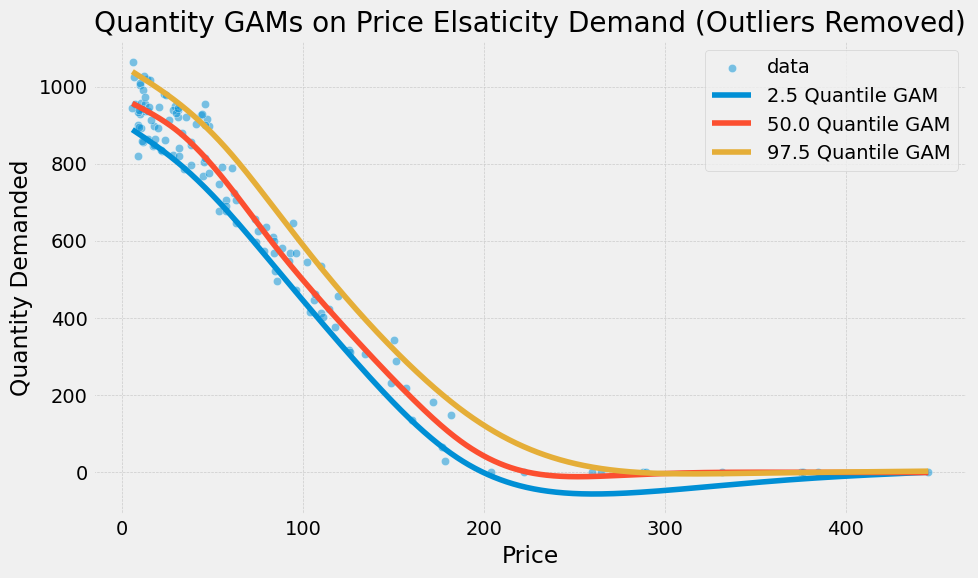

In [ ]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='quantity', alpha = 0.5, label='data')
# Plot Quantile GAMs
XX = np.linspace(df['price'].min(), df['price'].max(), 1000).reshape(-1,1)

for quantile, gam in gam_results.items():
  plt.plot(XX, gam.predict(XX), label=f'{quantile*100} Quantile GAM')
# Add the title and labels
plt.title('Quantity GAMs on Price Elsaticity Demand (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.legend()
plt.grid(True, which='both', linestyle = '--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Expectile GAM Benefits:
1. Quantile GAMs take into account changing Variance
2. Allows us to take into account the best and worst case scenarios in our Price Optimization

# Part II

In [ ]:
# !pip install pygam
import pandas as pd
import numpy as np

import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, f, l
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
from plotnine import *
import textwrap
import warnings
warnings.filterwarnings('ignore')